In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import numpy as np

2023-08-30 17:59:44.783949: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 17:59:44.820065: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 17:59:44.820641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 17:59:46.056385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df = df[~df.apply(lambda row: any(row == "?"), axis=1)]

In [5]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#literature seems to support dropping native country is not a strong preditor and is
df = df.drop('native-country', axis=1)
# education is similar to educational-num
df = df.drop('education', axis=1)
# occ
df = df.drop('race', axis=1)

In [7]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,Male,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,<=50K


In [8]:
one_hot = pd.get_dummies(df['workclass'])
df = df.drop('workclass', axis=1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['marital-status'])
df = df.drop('marital-status', axis=1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['relationship'])
df = df.drop('relationship', axis=1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['occupation'])
df = df.drop('occupation', axis=1)
df = df.join(one_hot)

gender_mapping = {'Male': 1, 'Female': 0}
df['gender'] = df['gender'].map(gender_mapping)

income_mapping = {'<=50K': 1, '>50K': 0}
df['income'] = df['income'].map(income_mapping)

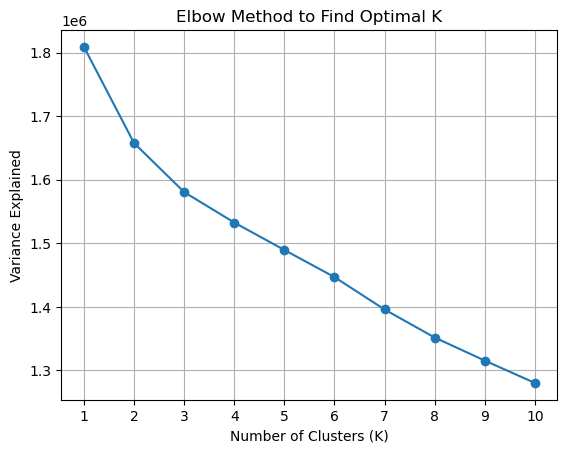

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Assuming your DataFrame is named df
data = df.drop(columns=['gender', 'income']) # Remove the 'gender' and 'income' col
scaler = StandardScaler() # Standardize the data to have zero mean and unit varianc
scaled_data = scaler.fit_transform(data)
# Initialize an empty list to store the variance explained for different number of c
variance_explained = []
# Test different numbers of clusters (K) and calculate the variance explained for ea
for num_clusters in range(1, 11): # Try K=1 to K=10 (you can adjust the range as ne
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    variance_explained.append(kmeans.inertia_) # kmeans.inertia_ gives the variance
# Plot the variance explained as a function of the number of clusters
plt.plot(range(1, 11), variance_explained, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Variance Explained')
plt.title('Elbow Method to Find Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for num_clusters in range(2, 20): # Try K=2 to K=10 (you can adjust the range as ne
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal K')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Assuming your DataFrame is named df
data = df.drop(columns=['gender', 'income']) # Remove the 'gender' and 'income' col
scaler = StandardScaler() # Standardize the data to have zero mean and unit varianc
scaled_data = scaler.fit_transform(data)
# Apply K-means clustering with, for example, 4 clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)
# Create separate dataframes for each cluster
cluster_0_df = df[df['cluster'] == 0].copy()
cluster_1_df = df[df['cluster'] == 1].copy()
cluster_2_df = df[df['cluster'] == 2].copy()
cluster_3_df = df[df['cluster'] == 3].copy()
# Now you have 4 separate dataframes: cluster_0_df, cluster_1_df, cluster_2_df, clus
# You can work with each of them independently as separate pandas dataframes.

In [11]:
cluster_0_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
27,23,134446,9,1,0,0,54,1,0,0,...,0,1,0,0,0,0,0,0,0,0
48,52,201062,7,0,0,0,18,1,0,0,...,0,0,0,1,0,0,0,0,0,0
68,46,170338,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,1,0
73,21,388946,10,0,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,0
82,24,83141,10,1,0,1876,40,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48732,40,195617,10,0,0,0,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48762,52,301229,11,0,0,0,40,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48790,32,192965,9,0,0,0,45,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48810,29,125976,9,0,0,0,35,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
cluster_1_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,25,226802,7,1,0,0,40,1,0,0,...,0,1,0,0,0,0,0,0,0,1
5,34,198693,6,1,0,0,30,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8,24,369667,10,0,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,1
12,26,82091,9,0,0,0,39,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16,20,444554,10,1,0,0,25,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48818,30,345898,9,1,0,0,46,1,0,0,...,0,0,0,0,0,0,0,0,0,1
48829,65,99359,15,1,1086,0,60,1,0,0,...,0,0,0,0,1,0,0,0,0,1
48834,32,116138,14,1,0,0,11,1,0,0,...,0,0,0,0,0,0,0,1,0,1
48836,22,310152,10,1,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [13]:
cluster_2_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
1,38,89814,9,1,0,0,50,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2,28,336951,12,1,0,0,40,0,0,1,...,0,0,0,0,0,1,0,0,0,2
3,44,160323,10,1,7688,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,2
7,63,104626,15,1,3103,0,32,0,0,0,...,0,0,0,0,1,0,0,0,0,2
9,55,104996,4,1,0,0,10,1,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48833,43,84661,11,1,0,0,45,1,0,0,...,0,0,0,0,0,0,1,0,0,2
48835,53,321865,14,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,2
48837,27,257302,12,0,0,0,38,1,0,0,...,0,0,0,0,0,0,0,1,0,2
48838,40,154374,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [14]:
cluster_3_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
18,37,60548,9,0,0,0,20,1,0,0,...,0,1,0,0,0,0,0,0,0,3
31,56,186651,7,0,0,0,50,1,0,0,...,0,0,1,0,0,0,0,0,0,3
34,26,43311,9,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,3
49,56,131916,9,0,0,0,50,1,0,0,...,0,0,0,0,0,0,0,0,0,3
51,39,280215,9,1,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48824,45,119199,12,0,0,0,48,1,0,1,...,0,0,0,0,1,0,0,0,0,3
48825,31,199655,14,0,0,0,30,1,0,0,...,0,0,1,0,0,0,0,0,0,3
48827,37,198216,12,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,3
48830,43,255835,10,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,3


In [15]:
labelled_data = cluster_1_df
labelled_data.to_csv('labelled.csv')

In [ ]:
#  cluster 0 is kinda small
# cluster 1 is decently sized like about a third pf the dataet
# cluster 3 is pretty small
# cluster 4 is like half the dataset 

#so probably cluster 1 is a decent candidate for the labelled data 

In [28]:


unlabelled_data = pd.concat([cluster_0_df,cluster_2_df], axis =0)
unlabelled_data = pd.concat([unlabelled_data,cluster_3_df], axis =0)



In [17]:
labelled_data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,25,226802,7,1,0,0,40,1,0,0,...,0,1,0,0,0,0,0,0,0,1
5,34,198693,6,1,0,0,30,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8,24,369667,10,0,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,1
12,26,82091,9,0,0,0,39,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16,20,444554,10,1,0,0,25,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48818,30,345898,9,1,0,0,46,1,0,0,...,0,0,0,0,0,0,0,0,0,1
48829,65,99359,15,1,1086,0,60,1,0,0,...,0,0,0,0,1,0,0,0,0,1
48834,32,116138,14,1,0,0,11,1,0,0,...,0,0,0,0,0,0,0,1,0,1
48836,22,310152,10,1,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [18]:
unlabelled_data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
27,23,134446,9,1,0,0,54,1,0,0,...,0,1,0,0,0,0,0,0,0,0
48,52,201062,7,0,0,0,18,1,0,0,...,0,0,0,1,0,0,0,0,0,0
68,46,170338,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,1,0
73,21,388946,10,0,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,0
82,24,83141,10,1,0,1876,40,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48824,45,119199,12,0,0,0,48,1,0,1,...,0,0,0,0,1,0,0,0,0,3
48825,31,199655,14,0,0,0,30,1,0,0,...,0,0,1,0,0,0,0,0,0,3
48827,37,198216,12,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,3
48830,43,255835,10,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:

unlabelled_data = unlabelled_data.drop('income', axis=1)
unlabelled_data.to_csv('unlabelled.csv')

In [ ]:
unlabelled_data

In [19]:
cluster_0_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
27,23,134446,9,1,0,0,54,1,0,0,...,0,1,0,0,0,0,0,0,0,0
48,52,201062,7,0,0,0,18,1,0,0,...,0,0,0,1,0,0,0,0,0,0
68,46,170338,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,1,0
73,21,388946,10,0,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,0
82,24,83141,10,1,0,1876,40,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48732,40,195617,10,0,0,0,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48762,52,301229,11,0,0,0,40,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48790,32,192965,9,0,0,0,45,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48810,29,125976,9,0,0,0,35,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
cluster_1_df['income'].value_counts()

1    14007
0      705
Name: income, dtype: int64

In [35]:
cluster_3_df['income'].value_counts()

1    7286
0     835
Name: income, dtype: int64

In [36]:
cluster_3_df.to_csv('test_new.csv')

In [37]:
new_unlabelled = pd.concat([cluster_0_df,cluster_2_df], axis =0)

In [39]:
new_unlabelled.to_csv('new_unlabelled.csv')